<h1><center>Metody numeryczne i optymalizacja</center></h1>

<h3><center>Lista 3</center></h3>
<h3><center>LINIOWE ZADANIA NAJMNIEJSZYCH KWADRATÓW</center></h3>



<h6><center>Antoni Bezdzietny 249327</center></h6>

<h6><center>Paweł Krysa 249171</center></h6>

<h6><center>12.04.2022</center></h6>

In [1]:
import numpy as np
import scipy.linalg as sp
import matplotlib.pyplot as plt

---
### Zaimplementowane algorytmy
---

#### Metoda najmniejszych kwadratów
Metoda stosowana do znajdowania rozwiązań przybliżonych w przypadku równań nadokreślonych(1), często układ sprzeczny.
$$ \boldsymbol{Ax=b}$$
$$ rank(\boldsymbol{A}) < rank(\boldsymbol{B})  (1)$$


Rozwiązaniem zgodnym z metoda najmniejszych kwadratów jest minimalizacja poniższego równania:
$$ min_x = \frac{1}{2}||\boldsymbol{b-Ax}||^2_2$$

Gdzie funkcją celu jest:
$$ \boldsymbol{\psi}(\boldsymbol{x})=\frac{1}{2}||\boldsymbol{r}||^2_2 $$ gdzie: $ \boldsymbol{r} = \boldsymbol{b}-\boldsymbol{Ax}$

Funkcje celu poddajemy minimalizacji. W tym celu wyznaczmy gradient:
$$ \nabla_x \boldsymbol{\psi}(\boldsymbol{x})  = 0$$

---
Implementacja:
$$ ||\boldsymbol{r} ||^2_2 = \boldsymbol{r^T}\boldsymbol{r} $$

zatem funkcja celu przyjmuje postać:

$$ \boldsymbol{\psi}(\boldsymbol{x}) = \frac{1}{2}\boldsymbol{r^T}\boldsymbol{r} = \frac{1}{2}\boldsymbol{(b-Ax)}^T\boldsymbol{(b-Ax)}= ... =\frac{1}{2}\boldsymbol{b^Tb-x^TA^Tb+}\frac{1}{2}\boldsymbol{x^TA^TAx}$$

Wyznaczenie gradientu funkcji celu i przyrównanie do 0 (znaleznienie minimum) (Sprowadzenie do układu równań normalnych):

$$ \nabla_x (\boldsymbol{\psi}(\boldsymbol{x})) = \boldsymbol{A^TAx-A^Tb}=0$$

Rozwiązanie:
$$ \boldsymbol{x = (A^TA)^{-1}A^Tb} $$

In [2]:
def LLS(A, b):
    """Funkcja rozwiazuje uklad rownan metoda najmniejszych kwadratow"""
    return np.linalg.inv(A.T@A) @ A.T @ b

---
### Regularyzacja

Regularyzacja jest stosowana do problemów źle określonych tzn. w przypadku złego uwarunkowania lub niepełnego rzędu.
W wyniku uzyskujemy rozwiązanie niejednoznaczne. Regularyzacja stabilizuje rozwiązanie i chroni przed nadmiernym dopasowaniem.

Stopień złego postawienia problemu jest opisana:
$$ cond(A) = \frac{\sigma_{max}}{\sigma_{min}}$$
,gdzie $\sigma$ - wartości singularne.

---
#### Regularyzacja Tikhonova
Typ regularyzacji morfologicznej, bazująca na metodnie najmniejszych kwadratów, gdzie do funkcji celu dodawany jest dodatkowy człon. 
$$ min_x = \frac{1}{2} ||\boldsymbol{b-Ax}||^2_2 + \alpha^2\Omega(\boldsymbol{x})$$

gdzie:

$\alpha > 0$ - parametr regularyzacji

$\Omega(\boldsymbol{x})$ - standardowo $||\boldsymbol{Lx}||^2_2$, gdzie $\boldsymbol{L=I_N}$, może to być jedna z norm lub inne funkcje

---
Implementacja dla standarrdowej funkcji $\Omega$:

$$ \boldsymbol{\psi}(\boldsymbol{x}) = \frac{1}{2} ||\boldsymbol{b-Ax}||^2_2 + \frac{\alpha^2}{2}\Omega(\boldsymbol{x}) = \frac{1}{2} ||\boldsymbol{b-Ax}||^2_2 + \frac{\alpha^2}{2}||\boldsymbol{Lx}||^2_2$$

Wyznaczenie gradientu funkcji celu i przyrównanie do 0 (znaleznienie minimum):

$$ \nabla_x (\boldsymbol{\psi}(\boldsymbol{x})) = \boldsymbol{A^TAx+}\alpha^2\boldsymbol{L^TLx-A^Tb}=0$$

Rozwiązanie:
$$ \boldsymbol{x = (A^TA+}\alpha^2\boldsymbol{L^TL)^{-1}   A^Tb} $$

In [3]:
def TikhonovRegularization(A,b,alpha=1):
    "Funkcja realizuje standardową regularyzację Tikhonova"
    L = np.eye(A.shape[1])
    return np.linalg.inv(A.T@A+alpha**2*L.T@L)@A.T@b
    

def IterativeTikhonovRegularization(A,b,alpha=1,eps=1e-6):
    "Funkcja realizuje iteracyjną regularyzację Tikhonova"
    error = 1
    x_k = np.zeros((A.shape[1],1))  
    while error > eps:
        x_k1 = x_k
        x_k = x_k1 + TikhonovRegularization(A, b-A@x_k1, alpha)
        error = np.linalg.norm(x_k-x_k1)
    return x_k
    

---
#### Truncated SVD (TSVD) 
Jeden ze sposobów regularyzacji, z możliwością regulacji rzędu numerycznego sumy. Umożliwia to uniknięcie sytuacji błędów przy bardzo małych wartościach singularnych. 

W przypadku równiania w postaci $\boldsymbol{Ax=b}$, gdzie $A\in R^{MxN}$, $M \geqslant N$, $\boldsymbol{A=U\sum N^T}$ - rozkład SVD, wtedy TSVD opisane jest poniższym wzorem:

$$ x_{LS} = \sum_{i=0}^k \frac{(\boldsymbol{U^Tb})_i}{\sigma_i}\boldsymbol{v}_i $$

, gdzie $k={i: \{\sigma_i > \tau \}}$ - gdzie $\tau$ jest minimalną wartością progową

In [4]:
def TSVD(A, b, tau=None):
    "Funkcja realizuje Truncated SVD"
    rank = np.linalg.matrix_rank(A) # Rzad macierzy
    U,s,Vh = np.linalg.svd(A)    # Rozkaład macierzy SVD
    k = s.size                   # k - ilość sumowań - ilość wartosci singularnych 
    if tau != None:
        k = (s>tau).sum()        # k = ilość wartosci singularnych  s > tau
                     
    xls = np.zeros((A.shape[1],1)) # Definicja wektora rozwiązań
    UTB = U.T@b                    # Wektor U^T@b
    for i in range(k):
        xls[:,0] = xls[:,0] + (UTB[i]/s[i]@Vh[[i],:]) # Wyznacznie sumy k składników
    return xls, k

---
#### Błąd średniokwadratowy
$$ MSE ({\hat {\theta }})=\operatorname {E} (({\hat {\theta }}-\theta )^{2})$$

In [5]:
def MSE(a,b, round_=3):
    "Funkcja wyznacz blad srednio kwadratowy"
    return np.mean( (a-b)**2 ).round(round_)

---
### Zadanie 1
Znajdź „ręcznie” przybliżone rozwiązania w sensie kryterium najmniejszych kwadratów dla poniższych układów równań sprzecznych:

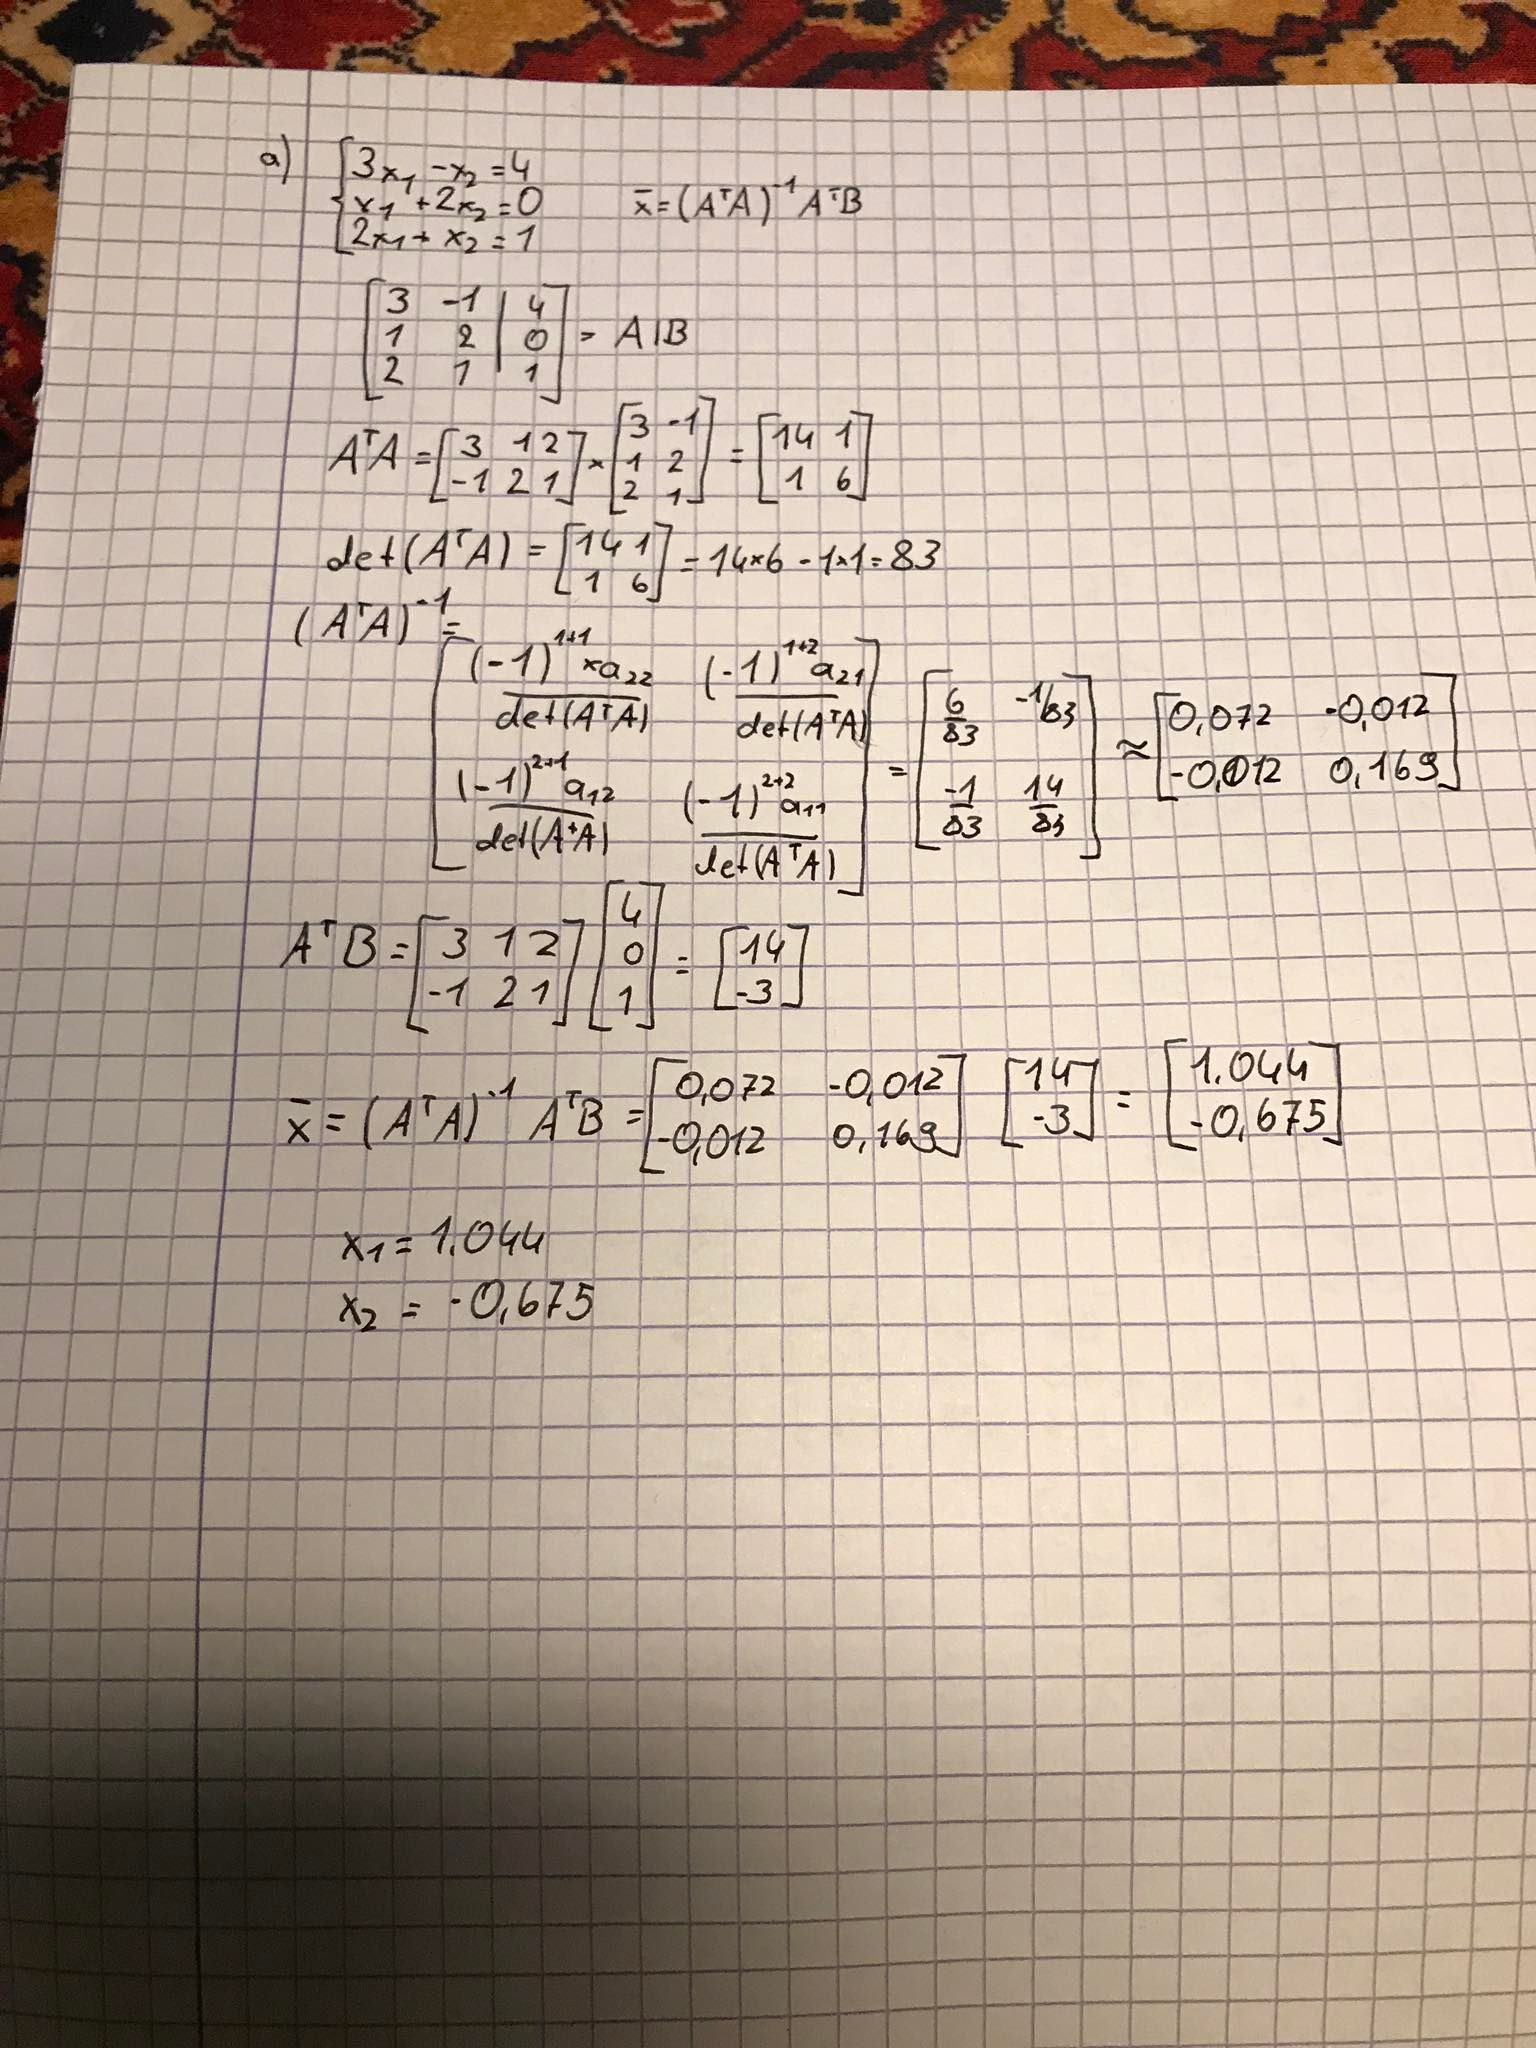

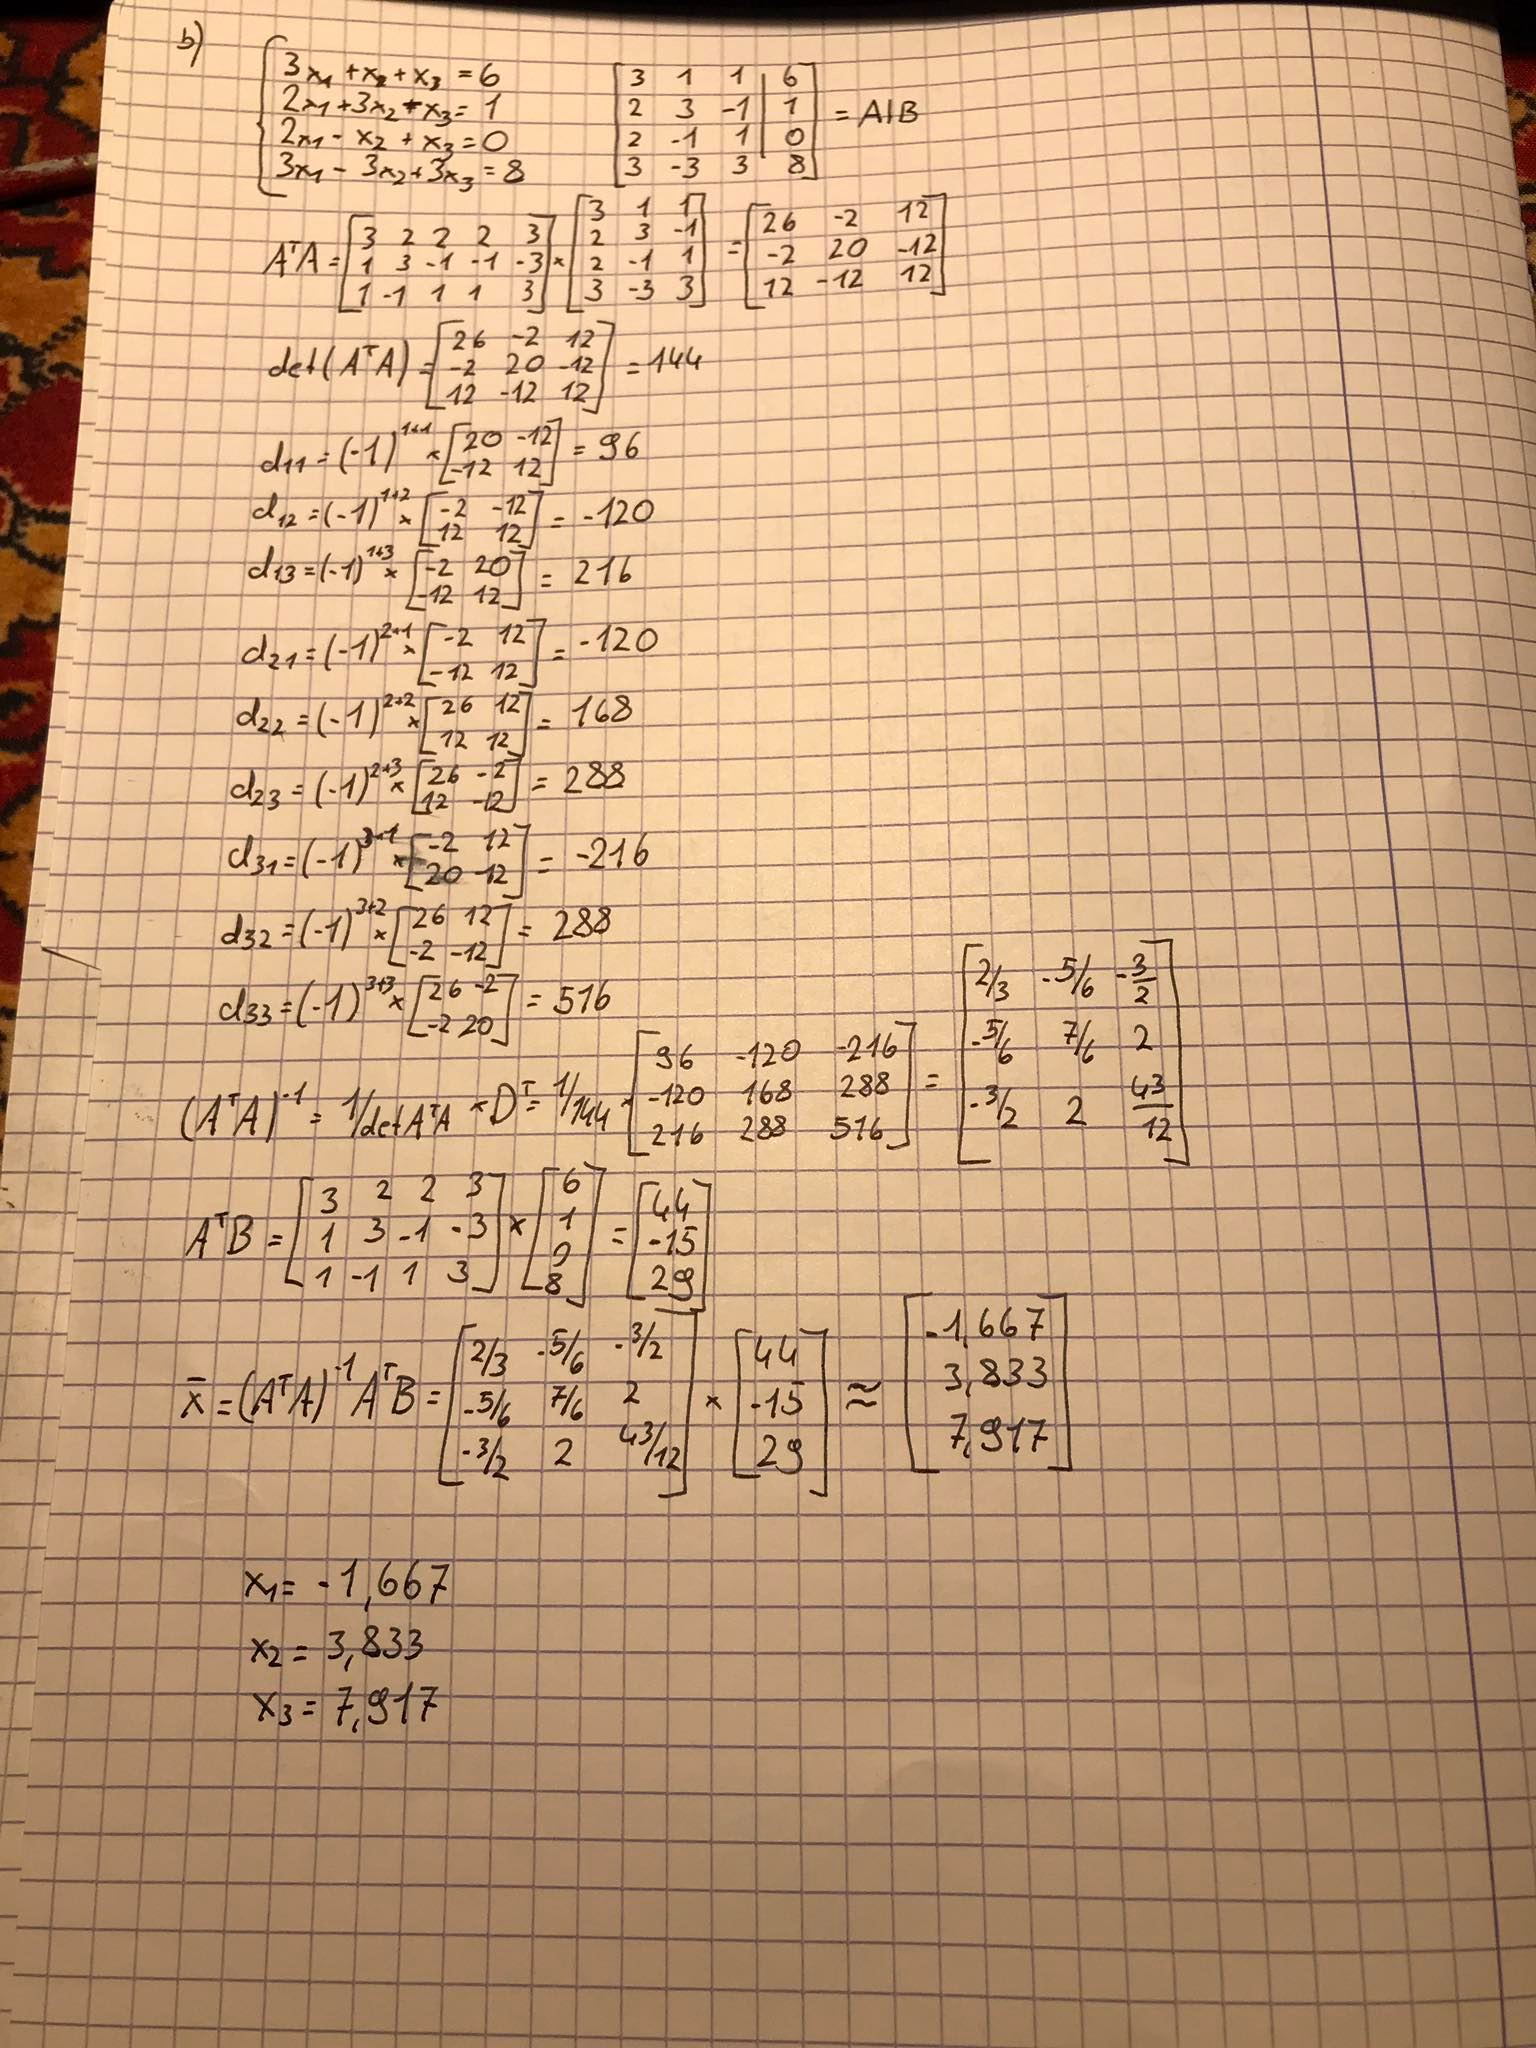

---
### Zadanie 2

Znajdź parametry funkcji , $a_0+a_1x^2+a_2sin(\frac{\pi x}{2})$ która aproksymuje poniższy
zbiór punktów na płaszczyźnie w sensie kryterium najmniejszych kwadratów:
(0,3), (1,0), (1,-1), (-1,2)

---
##### Objaśnienie
 - Mamy do czynienia z układnem nadokreślonym
 - Korzystając z wyżej przedstawionych wzorów metody najmniejszych kwadratów oraz funkcji LLS wyznaczmy parametry funkcji 

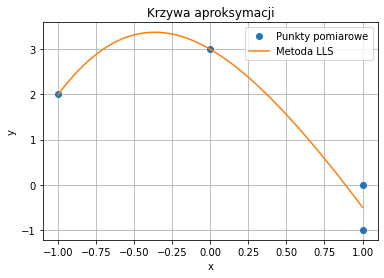

Błąd średniokwadratowy aproksymacji, MSE: 0.125
Wskaźnik uwarunkowania macierzy A: 3.943


In [6]:
# Podane punkty pomiarowe
points = np.array([[0,3],
                   [1,0],
                   [1,-1],
                   [-1,2]])

# Wyznaczenie macierzy A zgodnie z funkcja a0+a1x^2 + a2*sin(pi*x/2)
A = np.ones((points.shape[0],3))
A[:,1] = points[:,0]**2
A[:,2] = np.sin((np.pi*points[:,0])/2)

als = LLS(A,points[:,1]) # Wyznaczenie parametrów 

# Zbiór punktów do wyrysowania krzywej z wykorzystnaie wyznaczonych parametrów
x = np.linspace(np.min(points[:,0]),np.max(points[:,0]),1000)
y = als[0] + als[1]*x**2 + als[2]*np.sin((np.pi*x)/2)

# Wykreślenie wykresu
plt.title("Krzywa aproksymacji")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(points[:,0], points[:,1], 'o', label="Punkty pomiarowe")
plt.plot(x,y, label="Metoda LLS")
plt.grid()
plt.legend()
plt.show()

# Wyznaczenie błędu MSE
y_lls = als[0] + als[1]*points[:,0]**2 + als[2]*np.sin((np.pi*points[:,0])/2)
err = np.mean( (points[:,1]-y_lls)**2 ).round(3)
print("Błąd średniokwadratowy aproksymacji, MSE:", err)

# Wskaźnik uwarunkowania macierzy 
print("Wskaźnik uwarunkowania macierzy A:",np.linalg.cond(A).round(3))



#### Wnioski
Macierz poprawnie uwarunkowana(wskaźnik uwarunkowania macierzy - przyjmuje małą waartość) w takim przypadku podstawowa metoda najmniejszych kwadratów przynosi poprawne wynikia aproksymacji, dla wskazanej w zadaniu funkcji. Błąd średniokwadratowy na poziomie 0,125.

---
### Zadanie 3
Pocisk jest wystrzeliwany z terytorium wroga, a jego położenie w locie jest obserwowane przez radarowe urządzenia śledzące w następujących pozycjach:

| xi [km]| yi [km]  |
|------|------|
|   0  | 0|
|250|0|
|500|15|
|750|19|
|1000|20|


Załóżmy, że nasze źródła wywiadowcze wskazują, że wrogie pociski są zaprogramowane do
poruszania się po parabolicznym torze lotu. Oblicz jak daleko od punktu wystrzału spadnie
pocisk.

---
##### Objaśnienie
 - Mamy do czynienia z układem równań nadokreślonym
 - Korzystamy z metody najmniejszych kwadratów 
 - Tor lotu opisany jest parabolą:
$$y = ax^2 + bx + c$$
 - Funkcja osiąga maksimum (ramiona paraboli skierowane w dół)
$$a<0$$

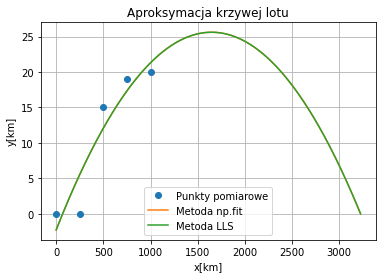

Pocisk uderzy w odległości  3225.55 km
Wskaźnik uwarunkowania macierzy A: 1106703.761

Dla metody LLS:
Wyznaczone współczynniki:  [-1.02857143e-05  3.38857143e-02 -2.28571429e+00]
Błąd średniokwadratowy  9.783

Dla metody numpy polyfit:
Wyznaczone współczynniki:  [-1.02857143e-05  3.38857143e-02 -2.28571429e+00]
Błąd średniokwadratowy  9.783


In [7]:
points = np.array([[0,0],
                   [250,0],
                   [500,15],
                   [750,19],
                   [1000,20]])


# Wyznaczenie parametrów własną metodą LLS
# Przygotowanie macierzy A
A = np.ones((points.shape[0],3))            
A[:,0] = points[:,0]**2
A[:,1] = points[:,0]        
als = LLS(A,points[:,1])                    # Wyznacznie parametrów funkcji

root = np.max(np.roots(als))                # Znalezienie miejsca zerowego położonego najdalej (prawe ramię)
x = np.linspace(0, root, num=1000)          # Odległość 0...root
yls = als[0]*x**2 + als[1]*x + als[2]   # Przebieg funkcji


# Wyznaczona funkcja metodą biblioteczną polyfit 
fit = np.polyfit(points[:,0],points[:,1],2) # Wyznaczenie współczynników funkcji
y = fit[0]*x*x + fit[1]*x + fit[2]          # Wycznaczenie funkcji 

# Wykreślenie wykresu
plt.plot(points[:,0], points[:,1], 'o', label="Punkty pomiarowe")
plt.plot(x,y, label="Metoda np.fit")
plt.plot(x,yls, label="Metoda LLS")
plt.legend()
plt.title("Aproksymacja krzywej lotu")
plt.xlabel("x[km]")
plt.ylabel("y[km]")
plt.grid()
plt.show()

  # Wyznaczneie wartości w punkatach pomiarowych

# Odległość jaką pokona pocisk jest określona przez miejsce zerowe funkcji, przy założeniu tej samej wysokości npm
print("Pocisk uderzy w odległości ",root.round(3),"km")   
print("Wskaźnik uwarunkowania macierzy A:",np.linalg.cond(A).round(3)) #Wskaźnik uwarunkowania macierzy

# Metoda LLS
print()
print("Dla metody LLS:")
print("Wyznaczone współczynniki: ",als)
y_pls = als[0]*points[:,0]**2 + als[1]*points[:,0] + als[2]
print("Błąd średniokwadratowy ",MSE(y_pls,points[:,1]))

print()
print("Dla metody numpy polyfit:")
print("Wyznaczone współczynniki: ",fit)
y_p = fit[0]*points[:,0]*points[:,0] + fit[1]*points[:,0] + fit[2]
print("Błąd średniokwadratowy ",MSE(y_p,points[:,1])) # Wyznaczneie błędu średniokwadratowego

#### Wnioski
Pocisk uderzy w odległości 3225,55km od punktu startowego (przy założeniu równej płaszczyzny). Aproksymację krzywej lotu przedstawiono powyżej.

W zadaniu parametry funkcji wyznaczono za pomocą własnoręcznie zaimplementowaniej metody LLS() oraz metody funkcji numpy polyfit(). W wyniku uzyskano takie same wyniki (współczynniki). Błąd średniokwadratowy 9,8. Wskaźnik uwarunkowania macierzy wysoki.

---
### Zadanie 4
Używając kryterium najmniejszych kwadratów dopasuj modele (a) i (b) do danych:

| x | y |
|------|------|
|-5| 2| 
|-4 |7| 
|-3 |9| 
|-2 |12| 
|-1 |13| 
|0 |14| 
|1 |14| 
|2 |13| 
|3| 10| 
|4| 8| 
|5|4|

(a) $y=a_1x + a_0$

(b) $y=a_2x^2 + a_1x + a_0$

Określ, który model lepiej dopasowuje się do danych na podstawie normy $l_2$ błędu dopasowania

---
#### Objaśnienie 
 - Problem nadokreślony
 - Korzystamy z metody najmniejszych kwadratów

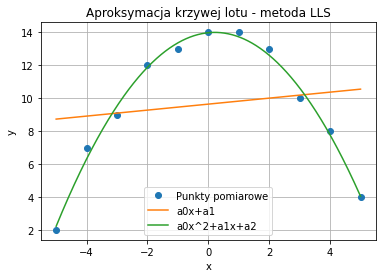

Wariant (a):
 a1 = 0.182  a0= 9.636
Błąd średniokwadratowy dla wariantu (a):  14.81

Wariant (b):
 a2 = -0.434  a1= 0.182  a0= -0.434
Błąd średniokwadratowy dla wariantu (b):  0.147


In [8]:
# Wykorzystując własną metodę LLS

points = np.array([[-5,2],
                   [-4,7],
                   [-3,9],
                   [-2,12],
                   [-1,13],
                   [0,14],
                   [1,14],
                   [2,13],
                   [3,10],
                   [4,8],
                   [5,4]])


# Wyznaczenie wektora x[min(x) max(x)]
x = np.linspace(np.min(points[:,0]), np.max(points[:,0]), num=1000) 

# Wariant (a)
A = np.ones(points.shape)
A[:,0] = points[:,0]
fit_als = LLS(A, points[:,1])
y_als = fit_als[0]*x + fit_als[1]
y_alsp = fit_als[0]*points[:,0] + fit_als[1]


# Wariant (b)
A = np.ones((points.shape[0], 3))
A[:,0] = points[:,0]**2
A[:,1] = points[:,0]

fit_bls = LLS(A, points[:,1])
y_bls = fit_bls[0]*x**2 + fit_bls[1]*x + fit_bls[2]
y_blsp = fit_bls[0]*points[:,0]**2 + fit_bls[1]*points[:,0] + fit_bls[2]


plt.plot(points[:,0], points[:,1], 'o', label="Punkty pomiarowe")
plt.plot(x,y_als,label="a0x+a1")
plt.plot(x,y_bls, label="a0x^2+a1x+a2")
plt.title("Aproksymacja krzywej lotu - metoda LLS")
plt.legend()
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print("Wariant (a):\n a1 =",fit_als[0].round(3)," a0=",fit_als[1].round(3))
print("Błąd średniokwadratowy dla wariantu (a): ",MSE(y_alsp,points[:,1]))
print()
print("Wariant (b):\n a2 =",fit_bls[0].round(3)," a1=",fit_bls[1].round(3)," a0=",fit_bls[0].round(3))
print("Błąd średniokwadratowy dla wariantu (b): ",MSE(y_blsp,points[:,1])) 

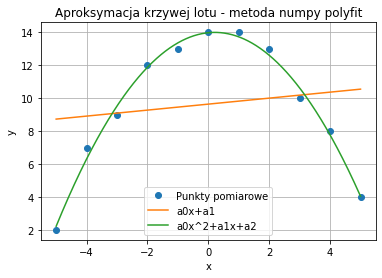

Wariant (a):
 a1 = 0.182 , a0= 9.636
Błąd średniokwadratowy dla wariantu (a):  14.81

Wariant (b):
 a2 = -0.434  a1= 9.636  a0= 0.182
Błąd średniokwadratowy dla wariantu (b):  0.147


In [9]:
# Wykorzystując metodę numpy polyfit

fit_a = np.polyfit(points[:,0], points[:,1], 1)
y_a = fit_a[0]*x + fit_a[1]
y_ap = fit_a[0]*points[:,0] + fit_a[1]

fit_b = np.polyfit(points[:,0], points[:,1], 2)
y_b = fit_b[0]*x**2 + fit_b[1]*x + fit_b[2]
y_bp = fit_b[0]*points[:,0]**2 + fit_b[1]*points[:,0] + fit_b[2]

# Wykreślenie wykresu
plt.plot(points[:,0], points[:,1], 'o', label="Punkty pomiarowe")
plt.plot(x,y_a, label="a0x+a1")
plt.plot(x,y_b, label="a0x^2+a1x+a2")
plt.legend()
plt.grid()
plt.title("Aproksymacja krzywej lotu - metoda numpy polyfit")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print("Wariant (a):\n a1 =",fit_a[0].round(3),", a0=",fit_a[1].round(3))
print("Błąd średniokwadratowy dla wariantu (a): ",np.mean( (points[:,1]-y_ap)**2 ).round(3))
print()
print("Wariant (b):\n a2 =",fit_b[0].round(3)," a1=",fit_a[1].round(3)," a0=",fit_a[0].round(3))
print("Błąd średniokwadratowy dla wariantu (b): ",np.mean( (points[:,1]-y_bp)**2 ).round(3)) 

#### Wnioski 
Lepiej dopasowuje się model (b) z błędem średniokwadratowym o wartości 0,147, gdzie model (a) błąd na poziomie 14,81. Krzywe aproksymacyjne przedstawiono powyżej.

Obie metody tj. LLS() i polyfit() zwróciły te same wartości.

---
### Zadanie 5 
Dopasuj szereg funkcji kosinusowych $g(x)=\sum^n_{j=0} c_jcosjx$ do funkcji kwadratowej $f(x)=\pi^2-x^2$
w taki sposób, aby minimalizować błąd: $|| f(x)-g(x) ||_2$ w przedziale $[0 : \pi]$ .
Oceń błąd dla n = 1, 2, 3, ..., 10.

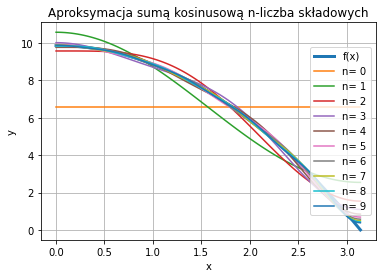

MSE dla n= 0 :  8.844
MSE dla n= 1 :  0.688
MSE dla n= 2 :  0.17
MSE dla n= 3 :  0.066
MSE dla n= 4 :  0.032
MSE dla n= 5 :  0.018
MSE dla n= 6 :  0.011
MSE dla n= 7 :  0.008
MSE dla n= 8 :  0.005
MSE dla n= 9 :  0.004


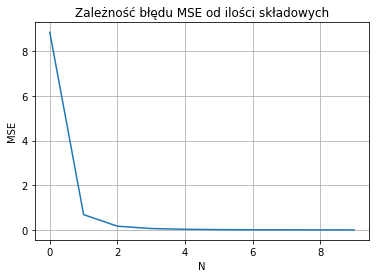

In [10]:
n = 10  # Maksymalna ilość składowych
N = 100 # Ilość punktów pomiarowych
x = np.linspace(0,np.pi,num=N) # Wektor n punktów z przedziału [0:pi]
fx = np.pi**2 - x**2 # Wartość funkcji f(x)

# Wygenerowanie tablicy dla przypadku n=10
An = np.ones((N,n))
for i in range(1,10):
    An[:,i] = np.cos(i*x)


cls = [LLS(An[:,:i+1],fx) for i in range(n)] # Wyznaczenie współczynników cj metodą LLS
yls = [np.array(An[:,:i+1]@cls[i]) for i in range(n)] # Wznacznie punktów z aproksymowanych funkcji
    
# Wykreślenie przebiegów 
plt.plot(x,fx, label="f(x)",linewidth=3.0)
for i in range(10):
    l_str = "n= "+str(i)
    plt.plot(x,yls[i],label=l_str)
plt.legend(loc='right')
plt.title("Aproksymacja sumą kosinusową n-liczba składowych")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

mse = [MSE(yls[i],fx) for i in range(n)] # Wyznaczenie błędu średniokwadratowego
for i in range(n):
    print("MSE dla n=",i,": ",mse[i])
    
# Wykres błędu    
plt.plot(range(0,10),mse)
plt.title("Zależność błędu MSE od ilości składowych")
plt.xlabel("N")
plt.ylabel("MSE")
plt.grid()
plt.show()

#### Wnioski

Wraz ze wzrostem ilości składowych sumy kosinusowej, błąd średniokwadratowy maleje. Zgodnie z TF - każdą funkcję okresową możemy przedstawić w postaci sumy sinusów i kosinusów z odpowiednimi wagami(funkcja określona na przedziale). 

---
### Zadanie 6
Dla $\boldsymbol{A}$ oraz dokładnego rozwiązania $\boldsymbol{x_*}=[1,2,3]^T$, wyznacz wektor danych dla modelu:$\boldsymbol{Ax=b}$ , a następnie: 

$ 
\boldsymbol{A}=
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
10 & 11 & 12 \\
13 & 14 & 15 
\end{bmatrix}  $

(a) wyznacz błąd rozwiązania $||\boldsymbol{x-x_*}||_2$ oraz błąd residualny $||\boldsymbol{b-Ax}||_2$ w funkcji parametru regularyzacji dla : 

 - (i) standardowej regularyzacji Tichnowa, 

 - (ii) TSVD (parametrem regularyzacji jest liczba wektorów osobliwych tworzących rozwiązanie),

(b) oszacuj rank($\boldsymbol{A}$) ,cond($\boldsymbol{A}$) oraz $\boldsymbol{A^+}$,

(c) wyznacz krzywą L i oszacuj optymalną wartość parametru regularyzacji dla obu
metod.

(a)


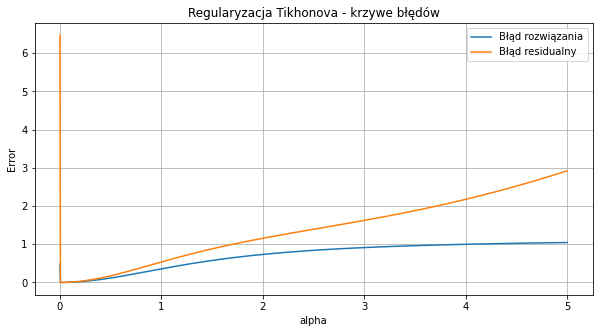

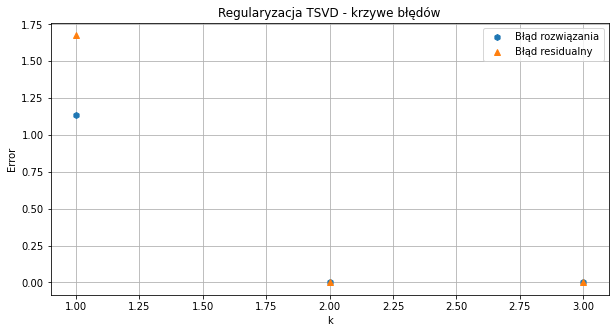

(b)
Rząd macierzy : rank(A)= 2
Wskaźnik uwarunkowania macierzy A: cond(A) =  3.5520479043802904e+16
Macierz pseudoodwrotna A+ = 
 [[-0.388889 -0.244444 -0.1       0.044444  0.188889]
 [-0.022222 -0.011111 -0.        0.011111  0.022222]
 [ 0.344444  0.222222  0.1      -0.022222 -0.144444]]
(c)


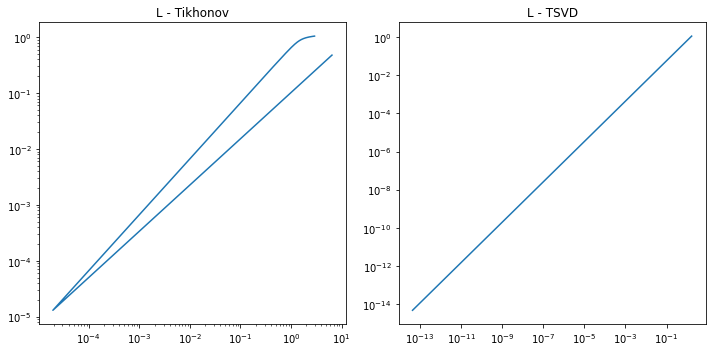

In [19]:
A = np.arange(1,16,dtype=np.double).reshape(5,3) # Wygenerowanie macierzy A
x = np.array([[1],[2],[3]])      # Wektor dokładnych rozwiązań
b = A@x                          # Wektor stałych

print("(a)")
#Regularyzacja Tikhonova
n=1000  # Licznba pomiarowych alpha
alp = np.linspace(1e-6,5,num=n)
xlx = [TikhonovRegularization(A,b,alp[i]) for i in range(n)]
err_solve = [np.linalg.norm(xlx[i]-x) for i in range(n)]
err_res = [np.linalg.norm(b-A@xlx[i]) for i in range(n)]
plt.plot(alp,err_solve, label="Błąd rozwiązania")
plt.plot(alp,err_res, label="Błąd residualny")
plt.title("Regularyzacja Tikhonova - krzywe błędów")
plt.xlabel("alpha")
plt.ylabel("Error")
plt.grid()
plt.legend()
plt.show()

# Metoda TSVD
U,s,V = np.linalg.svd(A) # Wyznaczenie wartości singularnych
s = np.append(s, np.NINF)
xlx_tsvd = [TSVD(A,b,s_+np.finfo(dtype=float).eps) for s_ in s]
error_solve_tsvd = [np.linalg.norm(xx[0]-x) for xx in xlx_tsvd]
error_res_tsvd = [np.linalg.norm(b-A@xx[0]) for xx in xlx_tsvd]
k = [i[1] for i in xlx_tsvd]
plt.title("Regularyzacja TSVD - krzywe błędów")
plt.plot(k[1:],error_solve_tsvd[1:], "h",label="Błąd rozwiązania")
plt.plot(k[1:],error_res_tsvd[1:], "^",label="Błąd residualny")
plt.xlabel("k")
plt.ylabel("Error")
plt.grid()
plt.legend()
plt.show()

print("(b)")
print("Rząd macierzy : rank(A)=",np.linalg.matrix_rank(A))
print("Wskaźnik uwarunkowania macierzy A: cond(A) = ", np.linalg.cond(A).round(3))
print("Macierz pseudoodwrotna A+ = \n",np.linalg.pinv(A).round(6))


print("(c)")
# Krzywe L
fig, axs = plt.subplots(1, 2)
axs[0].loglog(err_res,err_solve)
axs[0].set_title("L - Tikhonov")
axs[1].loglog(error_res_tsvd[1:],error_solve_tsvd[1:])
axs[1].set_title("L - TSVD")
fig.tight_layout()
plt.show()

---
#### Wnioski
Metoda Tikhonova dostarcza poprawnych wyników dla odpowiednio małego współczynnika lambda. Metoda TSVD dostarcza wyniki przybliżone dla 2 wektorów osobliwych.

---
### Zadanie 7
Niech będzie $\boldsymbol{c}=[0,1,...,N-1]^T$pierwszą kolumną, a $\boldsymbol{r}=[0,-1,...,-N+1]$ pierwszym wierszem macierzy Toeplitza.

Niech:
 - (a) $\boldsymbol{x^*}=[1,2,...,N]^T$
 - (b) $\boldsymbol{x^*}~N(0,1)$


In [12]:
N = 10 # Wymiar macierzy
c = np.arange(0,N) # Kolumna
r = np.arange(0,-N,-1) # Wiersz
A = sp.toeplitz(c, r) # Macierz Toeplitz

x_a = np.arange(1,N+1).reshape(N,1)  # Rozwiązanie a
b_a = A@x_a # Stałe rozwiązania a

x_b = np.random.randn(N).reshape(N,1)  # Rozwiązanie b
b_b = A@x_b # Stałe rozwiązania b

lmb = np.linspace(1e-6,5,num=int(1e3))
#Wariant A Tichnova
x_ls_tich_a = [TikhonovRegularization(A,b_a,l) for l in lmb]    # Regularyzacja
err_sol_tich_a = [np.linalg.norm(x_ls - x_a) for x_ls in x_ls_tich_a] # Błąd rozwiązania 
err_res_tich_a = [np.linalg.norm(b_a-A@x_ls) for x_ls in x_ls_tich_a] # Błąd residualny
#Wariant B Tichnowa
x_ls_tich_b = [TikhonovRegularization(A,b_b,l) for l in lmb]    # Regularyzacja
err_sol_tich_b = [np.linalg.norm(x_ls - x_b) for x_ls in x_ls_tich_a] # Błąd rozwiązania 
err_res_tich_b = [np.linalg.norm(b_b-A@x_ls) for x_ls in x_ls_tich_a] # Błąd residualny


# Regularyzacja TSVD
# Wariant a
U,s,V = np.linalg.svd(A) # Wyznaczenie wartości singularnych
x_ls_tsvd_a = [TSVD(A,b_a,s_-np.finfo(dtype=float).eps) for s_ in s] # Regularyzacja tsvd dla k[1...rank(A)]
err_sol_tsvd_a = [np.linalg.norm(x_ls[0] - x_a) for x_ls in x_ls_tsvd_a] # Błąd rozwiązania 
err_res_tsvd_a = [np.linalg.norm(b_a-A@x_ls[0]) for x_ls in x_ls_tsvd_a] # Błąd residualny
# Wariant b
x_ls_tsvd_b = [TSVD(A,b_b,s_-np.finfo(dtype=float).eps) for s_ in s] # Regularyzacja tsvd dla k[1...rank(A)]
err_sol_tsvd_b = [np.linalg.norm(x_ls[0] - x_b) for x_ls in x_ls_tsvd_b] # Błąd rozwiązania 
err_res_tsvd_b = [np.linalg.norm(b_b-A@x_ls[0]) for x_ls in x_ls_tsvd_b] # Błąd residualny
# Ilośc sum
k = [k_[1] for k_ in x_ls_tsvd_a]

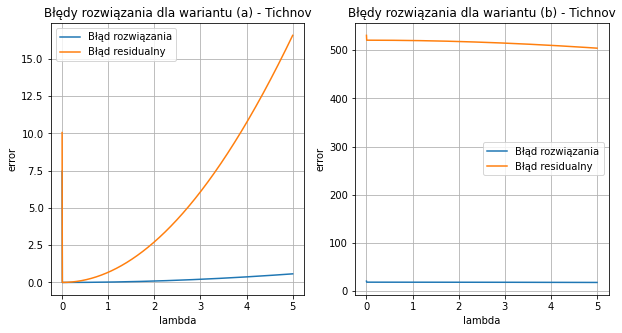

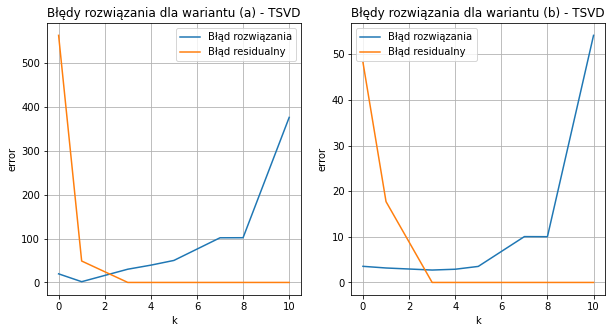

In [17]:
# Tichnov
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title("Błędy rozwiązania dla wariantu (a) - Tichnov")
ax1.set_xlabel("lambda")
ax1.set_ylabel("error")
ax1.plot(lmb,err_sol_tich_a, label="Błąd rozwiązania")
ax1.plot(lmb,err_res_tich_a, label="Błąd residualny")
ax1.legend()
ax1.grid()

ax2.set_title("Błędy rozwiązania dla wariantu (b) - Tichnov")
ax2.set_xlabel("lambda")
ax2.set_ylabel("error")
ax2.plot(lmb,err_sol_tich_b, label="Błąd rozwiązania")
ax2.plot(lmb,err_res_tich_b, label="Błąd residualny")
ax2.legend()
ax2.grid()

plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

# TSVD
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title("Błędy rozwiązania dla wariantu (a) - TSVD")
ax1.set_xlabel("k")
ax1.set_ylabel("error")
ax1.plot(k,err_sol_tsvd_a, label="Błąd rozwiązania")
ax1.plot(k,err_res_tsvd_a, label="Błąd residualny")
ax1.legend()
ax1.grid()

ax2.set_title("Błędy rozwiązania dla wariantu (b) - TSVD")
ax2.set_xlabel("k")
ax2.set_ylabel("error")
ax2.plot(k,err_sol_tsvd_b, label="Błąd rozwiązania")
ax2.plot(k,err_res_tsvd_b, label="Błąd residualny")
ax2.legend()
ax2.grid()

plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

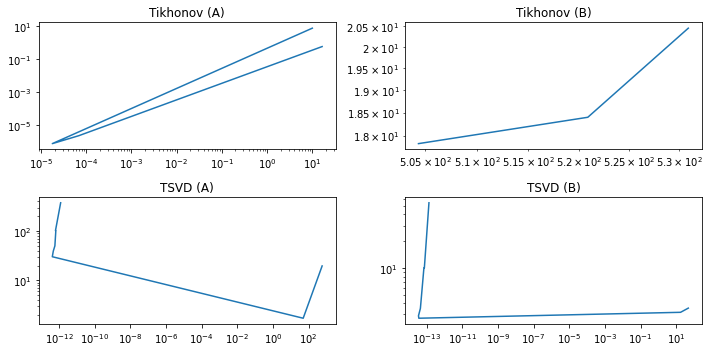

In [14]:
# Krzywe L
fig, axs = plt.subplots(2, 2)
axs[0, 0].loglog(err_res_tich_a,err_sol_tich_a)
axs[0, 0].set_title("Tikhonov (A)")
axs[0, 1].loglog(err_res_tich_b,err_sol_tich_b)
axs[0, 1].set_title("Tikhonov (B)")
axs[1, 0].loglog(err_res_tsvd_a,err_sol_tsvd_a)
axs[1, 0].set_title("TSVD (A)")
axs[1, 1].loglog(err_res_tsvd_b,err_sol_tsvd_b)
axs[1, 1].set_title("TSVD (B)")
fig.tight_layout()
plt.show()

In [15]:
# Parametry macierzy A 
N = [5,10,50,100] # Wymiar macierzy
c = [np.arange(0,n) for n in N] # Kolumna
r = [np.arange(0,-n,-1) for n in N] # Wiersz
A = [sp.toeplitz(c[i], r[i]) for i in range(len(N))] # Macierz Toeplitz

for i in range(len(N)):
    print("Dla N = ",N[i])
    print("Rząd macierzy : rank(A)=",np.linalg.matrix_rank(A[i]))
    print("Wskaźnik uwarunkowania macierzy : cond(A)=",np.linalg.cond(A[i]))
    print()

Dla N =  5
Rząd macierzy : rank(A)= 2
Wskaźnik uwarunkowania macierzy : cond(A)= 5.93621340251946e+16

Dla N =  10
Rząd macierzy : rank(A)= 2
Wskaźnik uwarunkowania macierzy : cond(A)= 3.15979774631525e+17

Dla N =  50
Rząd macierzy : rank(A)= 2
Wskaźnik uwarunkowania macierzy : cond(A)= 4.243595787413124e+19

Dla N =  100
Rząd macierzy : rank(A)= 2
Wskaźnik uwarunkowania macierzy : cond(A)= 2.2060421875212865e+20



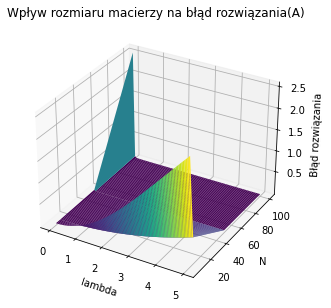

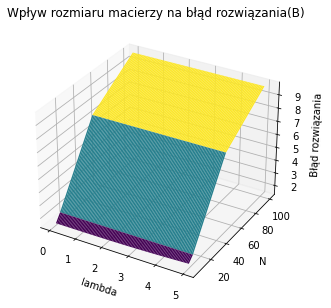

In [16]:
x_as = [np.arange(1,n+1).reshape(n,1) for n in N]  # Rozwiązanie a
b_as = [A[i]@x_as[i] for i in range(len(N))] # Stałe rozwiązania a

lmbs = np.linspace(6e-3,5,num=100)

x_tik_ls = list()
err_sol_tich_a_s = list()
err_res_tich_a_s = list()
for i in range(len(A)):
    x_tik_ls.append([TikhonovRegularization(A[i],b_as[i],lmb) for lmb in lmbs])
    err_sol_tich_a_s.append([np.linalg.norm(x_ls - x_as[i]) for x_ls in x_tik_ls[i]]) # Błąd rozwiązania 
    err_res_tich_a_s.append([np.linalg.norm(b_as[i]-A[i]@x_ls) for x_ls in x_tik_ls[i]]) # Błąd residualny

X,Y = np.meshgrid(lmbs,N)
ee = np.asarray(err_sol_tich_a_s)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, ee, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Wpływ rozmiaru macierzy na błąd rozwiązania(A)');
ax.set_xlabel('lambda')
ax.set_ylabel('N')
ax.set_zlabel('Błąd rozwiązania')
plt.show()

x_as = [np.random.randn(n).reshape(n,1) for n in N]  # Rozwiązanie b
b_as = [A[i]@x_as[i] for i in range(len(N))]

x_tik_ls = list()
err_sol_tich_a_s = list()
err_res_tich_a_s = list()
for i in range(len(A)):
    x_tik_ls.append([TikhonovRegularization(A[i],b_as[i],lmb) for lmb in lmbs])
    err_sol_tich_a_s.append([np.linalg.norm(x_ls - x_as[i]) for x_ls in x_tik_ls[i]]) # Błąd rozwiązania 
    err_res_tich_a_s.append([np.linalg.norm(b_as[i]-A[i]@x_ls) for x_ls in x_tik_ls[i]]) # Błąd residualny

X,Y = np.meshgrid(lmbs,N)
ee = np.asarray(err_sol_tich_a_s)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, ee, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Wpływ rozmiaru macierzy na błąd rozwiązania(B)');
ax.set_xlabel('lambda')
ax.set_ylabel('N')
ax.set_zlabel('Błąd rozwiązania')
plt.show()

#### Wnioski
W przypadku A błąd rozwiązania jest bezpośrednio związany z parametrem lambda oraz rozmiarem tablicy. Wraz z parametrem lambda < 1e-2 oraz rozmiarem macierzy N>10 błąd rozwiązania zaczyna gwałtownie rosnąć. W przypadku małych macierzy N < 40 błąd rozwiązania rośnie wraz z zbyt dużym parametrem lambda.

W przypadku gdy rozwiązaniem jest szum Gaussowski błąd rozwiązania zależy od wymiaru macierzy. Wraz ze wzrostem wymiaru rośnie błąd rozwiązania.